In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('data.csv')
data.columns

# explore data
# data.head()
# data.tail()
# data.describe()
data.info()

data.drop(['Unnamed: 0', 'offer_description'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

## Research Question 1: what is the most expensive car brand per fuel type?

### 1.1. Data Cleaning

In [23]:
# what is the most expensive car brand per fuel type?
# 1. data cleaning of relevant columns
# 2. group by brand and fuel type
# 3. sort by price
# 4. select first row of each group
# 5. plot

# 1. data cleaning of relevant columns
df = data[['brand', 'price_in_euro', 'fuel_type']]


In [24]:
# count null values
df.isna().sum()

brand            0
price_in_euro    0
fuel_type        0
dtype: int64

In [25]:
# histogram of fuel type count
df['fuel_type'].value_counts().head(25)

fuel_type
Petrol           143280
Diesel            86421
Hybrid            12607
Electric           5967
LPG                1255
CNG                 508
Diesel Hybrid       476
Other               178
Unknown              96
Hydrogen             82
Automatic            26
Manual               18
01/2023              13
Ethanol              10
02/2023               5
1.000 km              3
10/2022               3
03/2017               3
03/2023               3
03/2018               2
04/2022               2
10/2013               2
08/2018               2
06/2004               2
02/2018               2
Name: count, dtype: int64

In [26]:
# drop anything but diesel, petrol, hybrid, electric, LPG, CNG, diesel hybrid, hydrogen and ethanol
df = df[df['fuel_type'].isin(['Diesel', 'Petrol', 'Hybrid', 'Electric', 'LPG', 'CNG', 'Diesel Hybrid', 'Hydrogen', 'Ethanol'])]

In [27]:
df['fuel_type'].value_counts()

fuel_type
Petrol           143280
Diesel            86421
Hybrid            12607
Electric           5967
LPG                1255
CNG                 508
Diesel Hybrid       476
Hydrogen             82
Ethanol              10
Name: count, dtype: int64

In [28]:
df['brand'].value_counts()

brand
volkswagen       33232
mercedes-benz    27195
audi             21134
opel             20352
bmw              19779
ford             18753
skoda            14010
seat             11908
renault           8685
toyota            8190
hyundai           6979
peugeot           5841
kia               5720
fiat              5028
mini              4290
mazda             4203
volvo             4154
citroen           4068
porsche           3941
nissan            3778
dacia             3363
land-rover        3071
jeep              1743
smart             1641
alfa-romeo        1437
jaguar            1398
mitsubishi         924
honda              785
maserati           696
dodge              665
ferrari            585
bentley            539
lamborghini        360
ssangyong          342
aston-martin       277
saab               233
isuzu              205
daihatsu           203
chevrolet          191
lada               190
cadillac           157
infiniti           112
lancia             105
daewo

In [29]:
df['brand'].isnull().sum()

0

In [30]:
df['price_in_euro'].dtypes

dtype('O')

In [31]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

In [32]:
# calculate percentage of missing values
df['price_in_euro'].isnull().sum() / len(df) * 100

0.0

In [33]:
# drop null values
df = df.dropna(subset=['price_in_euro'])

In [34]:
df.isnull().sum()

brand            0
price_in_euro    0
fuel_type        0
dtype: int64

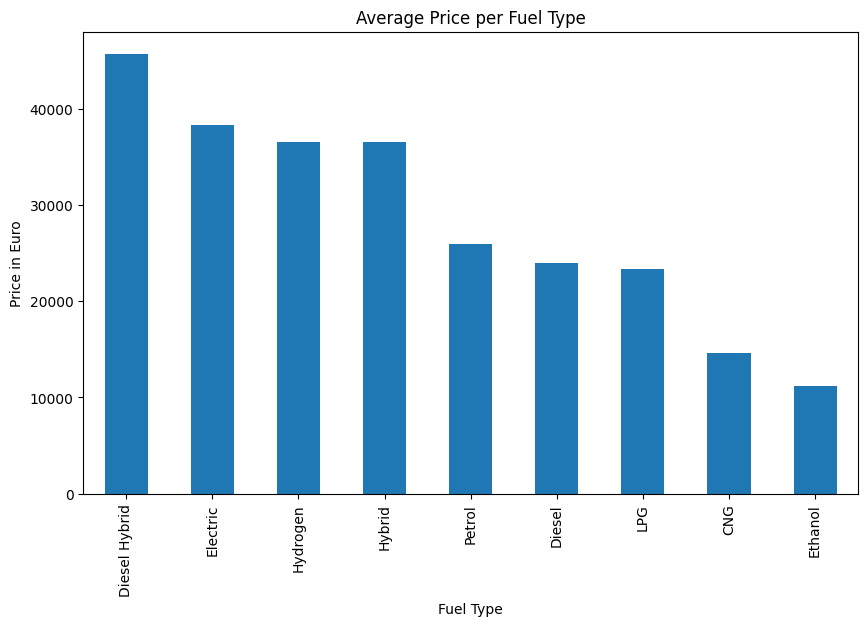

In [35]:
# visualise distribution of price per fuel type
line = df.groupby('fuel_type')['price_in_euro'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
line.set_xlabel('Fuel Type')
line.set_ylabel('Price in Euro')
line.set_title('Average Price per Fuel Type')
plt.show()

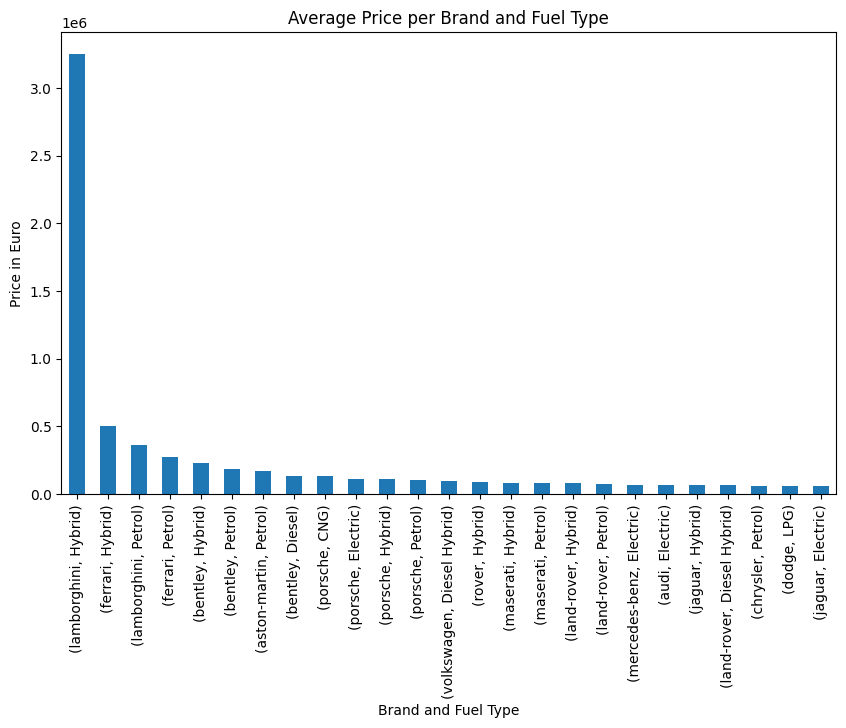

In [36]:
# 2. group by brand and fuel type
df.groupby(['brand', 'fuel_type'])['price_in_euro'].mean().sort_values(ascending=False).head(25)
line = df.groupby(['brand', 'fuel_type'])['price_in_euro'].mean().sort_values(ascending=False).head(25).plot(kind='bar', figsize=(10, 6))
line.set_xlabel('Brand and Fuel Type')
line.set_ylabel('Price in Euro')
line.set_title('Average Price per Brand and Fuel Type')
plt.show()

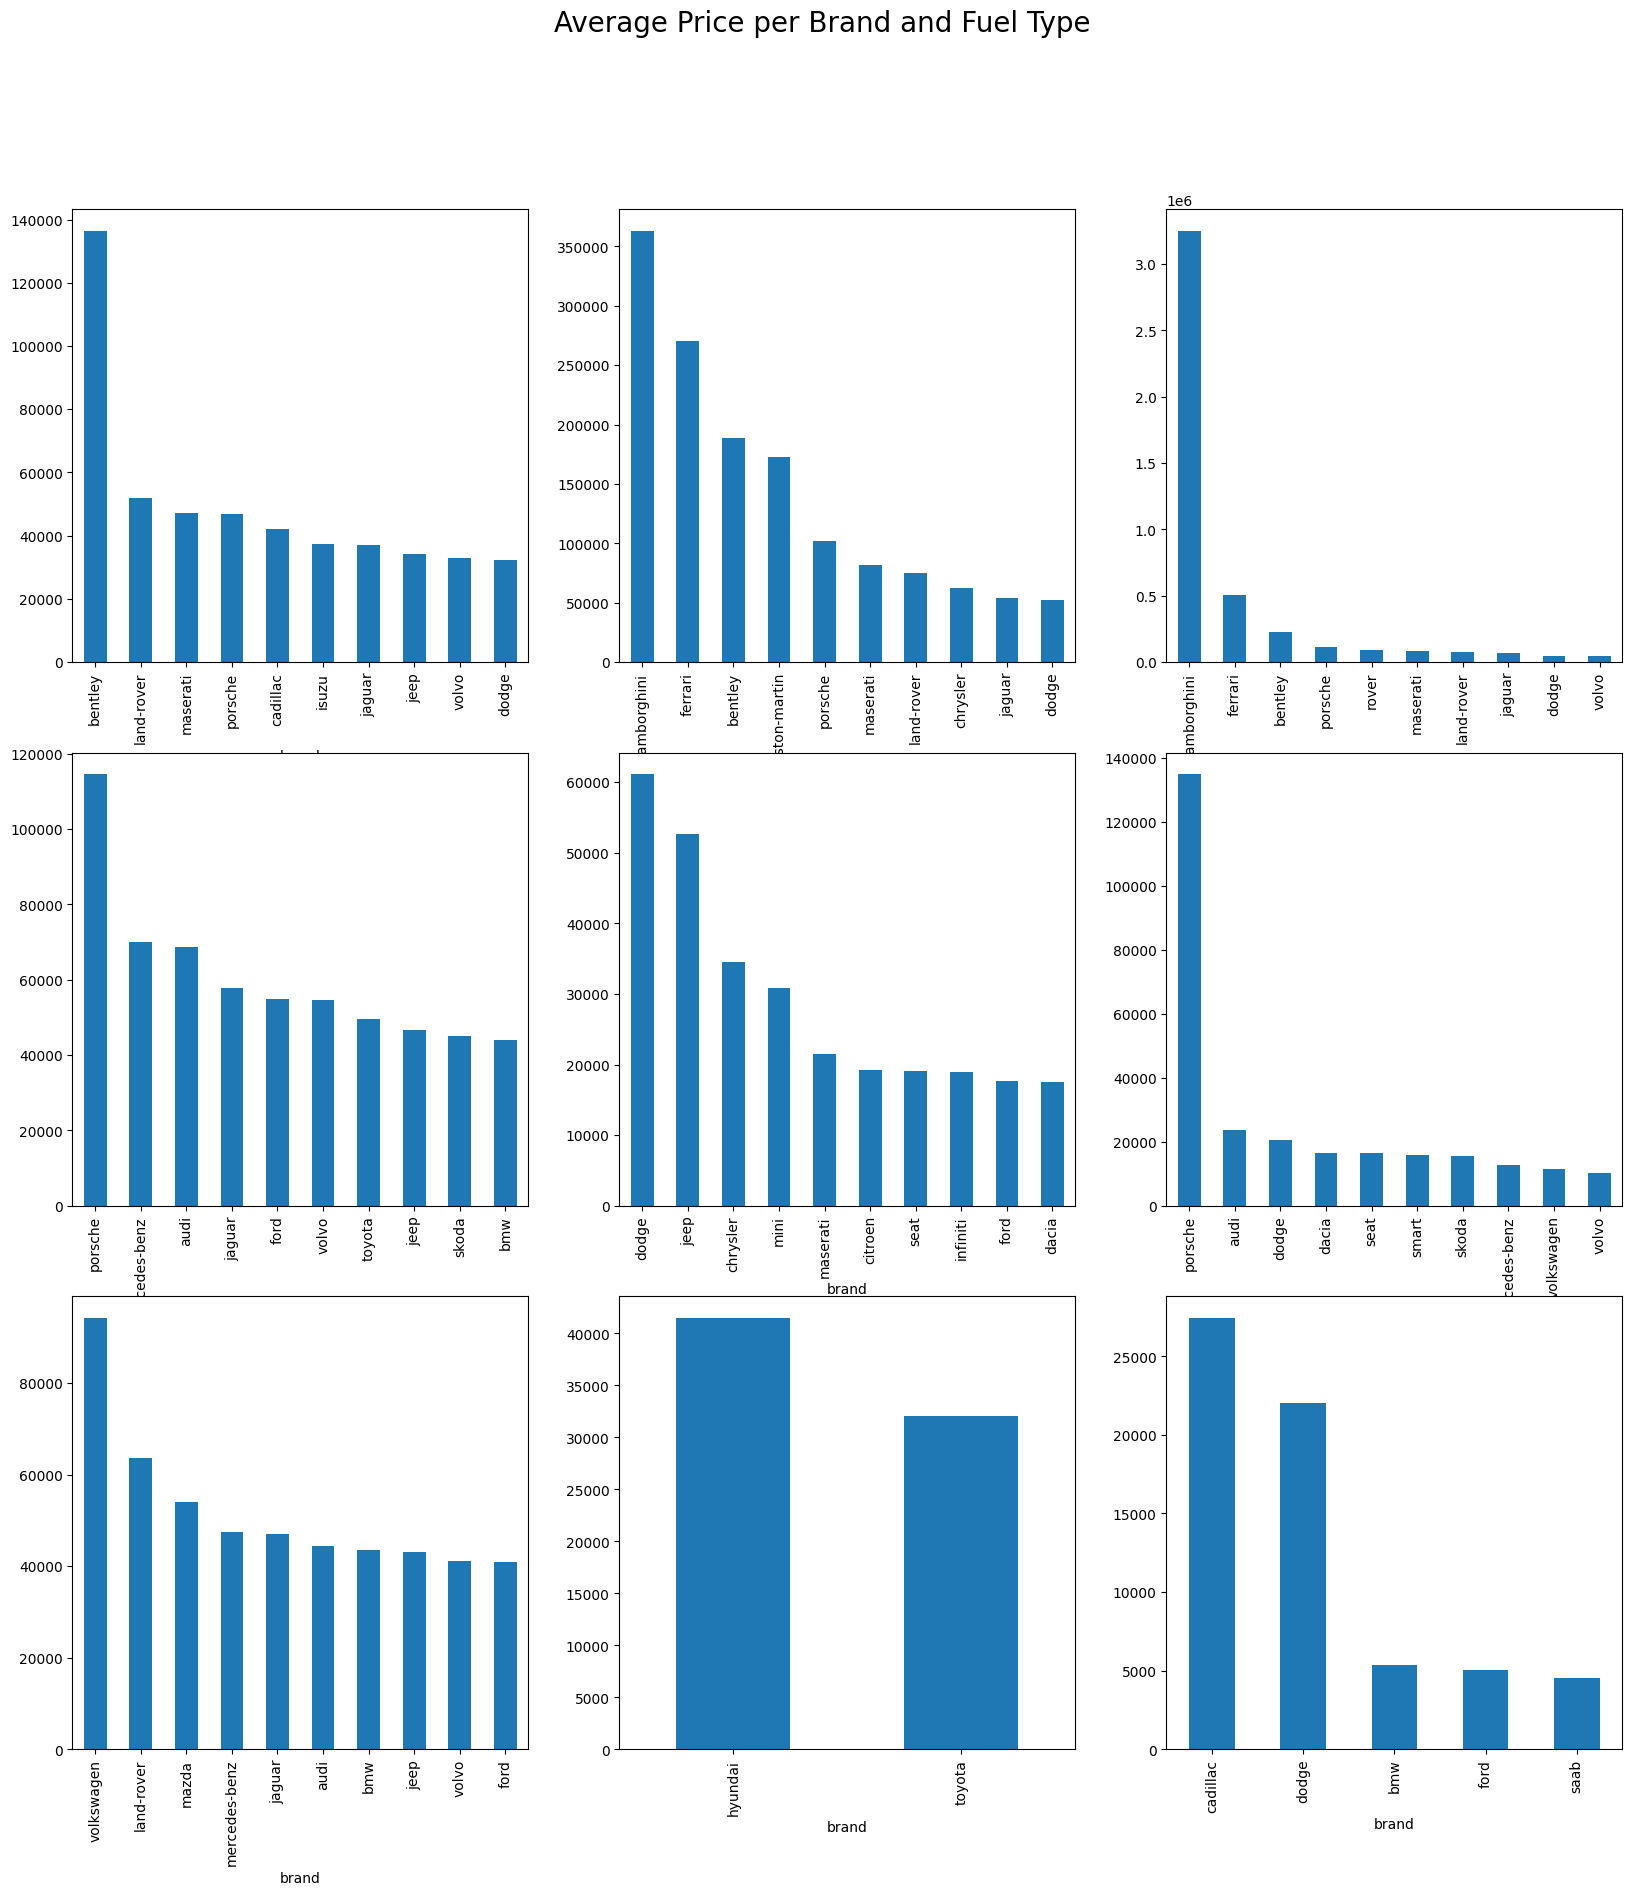

In [37]:
# make a table per fuel type
df_diesel = df[df['fuel_type'] == 'Diesel']
df_petrol = df[df['fuel_type'] == 'Petrol']
df_hybrid = df[df['fuel_type'] == 'Hybrid']
df_electric = df[df['fuel_type'] == 'Electric']
df_lpg = df[df['fuel_type'] == 'LPG']
df_cng = df[df['fuel_type'] == 'CNG']
df_diesel_hybrid = df[df['fuel_type'] == 'Diesel Hybrid']
df_hydrogen = df[df['fuel_type'] == 'Hydrogen']
df_ethanol = df[df['fuel_type'] == 'Ethanol']

# make one visualisation per fuel type in a single figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
fig.suptitle('Average Price per Brand and Fuel Type', fontsize=20)
df_diesel.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0, 0])
df_petrol.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0, 1])
df_hybrid.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0, 2])
df_electric.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1, 0])
df_lpg.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1, 1])
df_cng.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1, 2])
df_diesel_hybrid.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[2, 0])
df_hydrogen.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[2, 1])
df_ethanol.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[2, 2])
plt.show()